### Boston 데이터 세팅

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

#경고 없애기
import warnings
warnings.filterwarnings('ignore')

In [3]:
#보스턴 집값 불러오기
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
#DESCR - description 설명 보기
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = boston['data']
label = boston['target']
columns = boston['feature_names']

In [6]:
#데이터 프레임 객체로 변환
data = pd.DataFrame(data, columns = columns)
data.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       1

In [7]:
data.shape

(506, 13)

### Simple Linear Regression

In [8]:
#하나의 속성(방 개수)만으로 예측

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=2022) 

In [9]:
#방 개수 = RM
X_train['RM']

256    7.454
288    6.315
318    6.382
136    5.942
233    8.247
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 404, dtype: float64

사이킷런은 2차원 이상의 데이터만 취급한다.  
따라서 위의 데이터를 바로 사용할 수 없다.

In [10]:
#reshape를 통해 다시 만든다.
X_train['RM'].values.reshape(-1,1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

(행,열)이고 전체 개수를 알 수 없을 경우에는 -1을 하여 준다.  
([:5]는 데이터를 5개만 출력하여 결과를 보기위해 붙여준다.)

In [11]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [12]:
#학습하기
sim_lr.fit(X_train['RM'].values.reshape(-1,1), y_train)

LinearRegression()

In [13]:
#예측 결과 출력
y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))

#### 결과 분석

In [14]:
#결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2: 0.2121


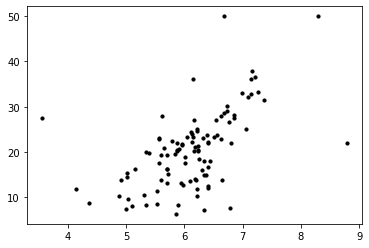

In [15]:
#결과 시각화 하기
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')

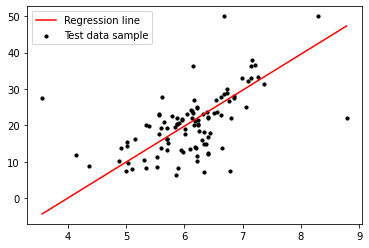

In [16]:
plt.scatter(X_test['RM'], y_test, s=10, c='black')
# 선 추가
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line','Test data sample'], loc='upper left')

### Multiple Linear Regression

In [17]:
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)     #X_train으로 모든 속성을 사용

LinearRegression()

In [18]:
y_pred = mul_lr.predict(X_test)
print('다중 선현 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선현 회귀, R2: 0.6226


회귀 모델의 계수 w, 절편 b를 확인한다.  
어떤 변수에 얼마 만큼의 가중치가 할당되고, 절편 값은 얼마나 할당되는지 살펴볼 수 있습니다.

In [25]:
print('다중 선형 회귀, 계수(w) : {}, 절편(b) : {:.4f}'.format(mul_lr.coef_, mul_lr.intercept_))

다중 선형 회귀, 계수(w) : [-1.09358524e-01  4.17604608e-02  4.92275845e-02  2.75483861e+00
 -1.37425402e+01  4.71242684e+00 -1.19656681e-02 -1.43522444e+00
  2.98673854e-01 -1.23637115e-02 -8.95540107e-01  1.03495304e-02
 -5.21139480e-01], 절편(b) : 27.6150


### Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 5)

트리가 몇 단계까지 내려갈지 max_depth를 통하여 설정한다  
실제로 코딩하면 재귀호출 형태를 띈다.

In [20]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=5)

In [21]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [22]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3247


단계를 4로 하면 0.3474  
단계를 7로 하면 0.3164  
오버피팅 현상이 발생한다.

#### 그렇다면 제일 좋은 깊이는 몇 일까?
반복문을 활용하여 제일 R2값이 높은 깊이가 나올때까지 돌려서 확인하는 것이 제일 좋다

In [23]:
arr = np.arange(1, 10)  #1부터 10까지 생성
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
  
  temp_r2 = r2_score(y_test, y_pred)
  #print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))

최적의 결과는 depth=3 r2=0.3931


### 다중 결정 트리

In [29]:
dt_regr = DecisionTreeRegressor(max_depth=8)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7417


### Support Vector machine Regressor

In [31]:
# Support Vector machine Regressor 
from sklearn.svm import SVR
svm_regr = SVR(C=5)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4049


![서포트벡터사진](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

2개의 그룹에 가운데를 관통하는 회귀선을 만든다.  
여기서 중요 포인트는 가운데의 선을 최적의 각도로 긋는 것이다.  
사용되는 방법은 빨간 선에서 양 옆으로 선을 점점 늘렸을때 가장 서포트 벡터에 안 걸리게 넓힐 수 있는 각도가 가장 좋은 직교하는 라인이라는 것을 알 수 있다.

여기서 자주 사용하는 옵션은 아웃라이너 안에 몇 개의 서포트 벡터가 들어와도 허용하여 좀 더 좋은 선을 긋는다.  
위의 코드에서 5개까지 허용하는 것을 볼 수 있다.  
이 모델은 분류와 회귀에서 사용할 수 있는 모델이다. 선을 긋기 때문에 회귀에서 사용할 수 있다.

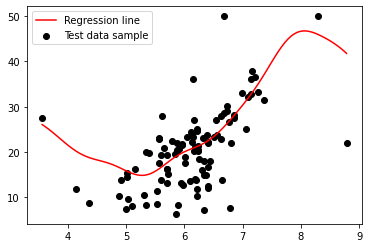

In [32]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

### Multi Layer Perceptron Regressor(MLP)

딥러닝의 기본 모델인 뉴럴 네트워크를 기반으로 한 회귀 모델  
기본적으로 MLP라 하면, 입력층-은닉층-출력층 3개로 이루어진 뉴럴 네트워크를 의미한다

![mlp 사진](images/mlp.jpg)

In [34]:
from  sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor()

mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중 MLP 회귀, R2: {:.4f}'.format(r2_score(y_test,y_pred)))

다중 MLP 회귀, R2: 0.4919


+)옵션 추가

In [35]:
#왠만하면 adam이 제일 잘 맞는다.
mlp_regr = MLPRegressor(solver='adam',hidden_layer_sizes=300,max_iter=300) #lbfgs, sgd, adam

mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중 MLP 회귀, R2: {:.4f}'.format(r2_score(y_test,y_pred)))

다중 MLP 회귀, R2: 0.5026


hidden_layer_sizes의 기본 값은 100이며, hidden_layer층의 크기를 정한다.  
max_iter의 기본 값은 200이며, 결과를 내기 위해서 최대 반복 횟수를 지정한다.